# TF-IDF : 문서의 정량화

* 문서를 무엇으로 정량화할 것인가?

* tf (term frequency) : 단어가 얼마나 자주 등장하는가? - 자주 등장하는 단어가 중요함

* idf(inverse docuement frequency) : 많이 사용되지 않는 단어가 오히려 중요

* tf-idf : heuristic quantity 
    * 주먹구구식 통계량으로서 튼튼한 기반위에 있다고 보지 않는다.

* 언제 사용하는가?
* 소설집에 포함된 소설이나 웹사이트 모음집에 들어 있는 1개 웹사이트와 같은 문서 모임집에 속한 1개 문서의 특정 단어에 대한 중요도를 측정하기 위한 용도로 사용

In [1]:
library(dplyr)
library(tidytext)
library(janeaustenr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [9]:
(
    austen_books()
     %>% unnest_tokens(input = text, output=word, token='words')
     %>% count(book, word, sort=T)
     %>% ungroup() # why?
#      %>% head(5)
)  -> words_frequency_per_book

In [12]:
(
    words_frequency_per_book
     %>% group_by(book)
     %>% summarise(total = sum(n))
#      %>% head(5)
) -> total_words_frequency_per_book

In [29]:
(
    words_frequency_per_book
     %>% left_join(total_words_frequency_per_book)
#      %>% head(10)
) -> book_words

Joining, by = "book"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 896 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

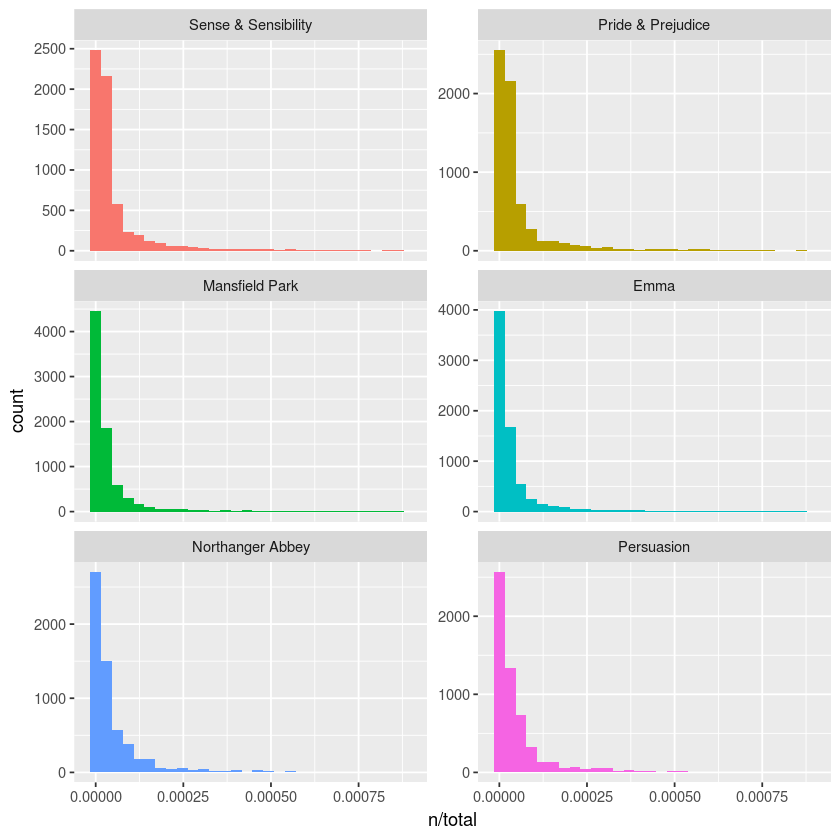

In [33]:
library(ggplot2)

(
    book_words
     %>% ggplot(aes(n/total, fill=book)) 
    + geom_histogram(show.legend = FALSE)
    + xlim(NA, 0.0009) 
    + facet_wrap(~book, ncol=2, scales='free_y')
#      %>% head(3)
)


In [50]:
(
    book_words
     %>% group_by(book)
     %>% mutate(rank = row_number(),
               `term frequency` = n/total)
) -> freq_by_rank

In [51]:
(
    freq_by_rank
     %>% head(10)
)

book,word,n,total,rank,term frequency
Mansfield Park,the,6206,160460,1,0.03867631
Mansfield Park,to,5475,160460,2,0.03412065
Mansfield Park,and,5438,160460,3,0.03389007
Emma,to,5239,160996,1,0.03254118
Emma,the,5201,160996,2,0.03230515
Emma,and,4896,160996,3,0.03041069
Mansfield Park,of,4778,160460,4,0.02977689
Pride & Prejudice,the,4331,122204,1,0.03544074
Emma,of,4291,160996,4,0.02665284
Pride & Prejudice,to,4162,122204,2,0.03405780


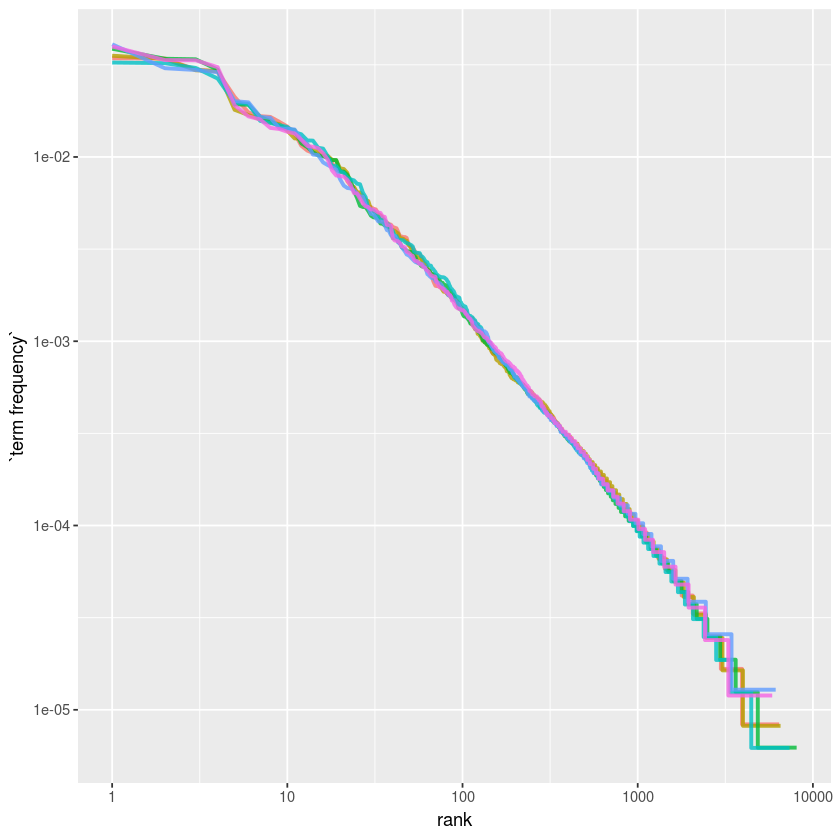

In [52]:
(
    freq_by_rank
     %>% ggplot(aes(rank,`term frequency`, color=book))
    + geom_line(size=1.1, alpha=0.8, show.legend = FALSE)
    + scale_x_log10()
    + scale_y_log10()
)

* 이 그래프를 어떻게 해석해야 하는가?
* 일단 jane austen의 6개 소설이 비슷한 분포를 갖는다는 것
* 순위와 빈도의 관계가 음의 관계라는 것

* 이제 이 차트가 power-law를 따르는지 살펴보려고 한다.
* 끝부분은 따르지 않기 때문에 중간 부분만 추출해서 살펴보려고 하는 것이다.

In [54]:
(
    freq_by_rank
     %>% filter(rank < 500, rank > 10)
) -> rank_subset

In [55]:
lm(log10(`term frequency`) ~ log10(rank), data=rank_subset)


Call:
lm(formula = log10(`term frequency`) ~ log10(rank), data = rank_subset)

Coefficients:
(Intercept)  log10(rank)  
    -0.6226      -1.1125  


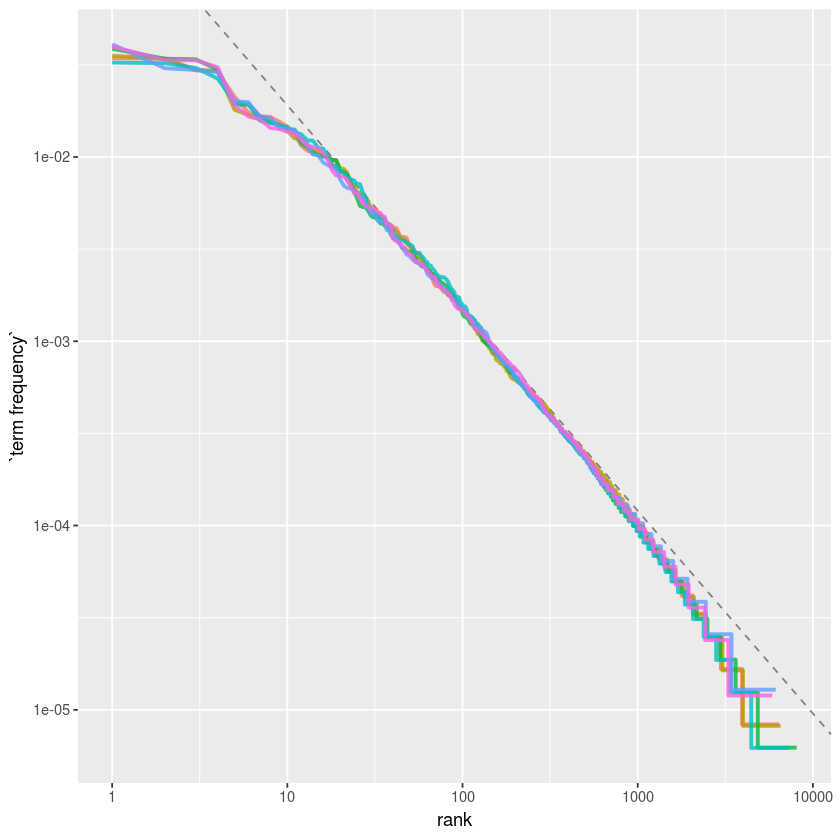

In [56]:
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, color = book)) + 
  geom_abline(intercept = -0.62, slope = -1.1, color = "gray50", linetype = 2) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + 
  scale_x_log10() +
  scale_y_log10()